<a href="https://colab.research.google.com/github/puneat/Audio_Sentiment/blob/master/without_gender_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, Reshape
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ref = pd.read_csv("/gdrive/My Drive/Audio_Sentiment/male_df.csv")
ref.head()

,labels,source,path
0,male_disgust,SAVEE,/gdrive/My Drive/Audio_files/male_final/SAVEE/...
1,male_disgust,SAVEE,/gdrive/My Drive/Audio_files/male_final/SAVEE/...
2,male_disgust,SAVEE,/gdrive/My Drive/Audio_files/male_final/SAVEE/...
3,male_disgust,SAVEE,/gdrive/My Drive/Audio_files/male_final/SAVEE/...
4,male_disgust,SAVEE,/gdrive/My Drive/Audio_files/male_final/SAVEE/...


In [4]:
frames=[ref,ref,ref,ref,ref,ref];
df_label=pd.concat(frames);

In [5]:
male_df_label= df_label['labels'].to_numpy()

In [6]:
np.unique(male_df_label[:])

array(['male_angry', 'male_disgust', 'male_fear', 'male_happy',
       'male_neutral', 'male_sad', 'male_surprise'], dtype=object)

In [7]:
male_df_label.shape

(30780,)

In [8]:
for i in range(0,male_df_label.shape[0]):
  if male_df_label[i]=='male_angry':
    male_df_label[i]='angry'
  elif male_df_label[i]=='male_disgust':
    male_df_label[i]='disgust'
  elif male_df_label[i]=='male_fear':
    male_df_label[i]='fear'
  elif male_df_label[i]=='male_happy':
    male_df_label[i]='happy'
  elif male_df_label[i]=='male_neutral':
    male_df_label[i]='neutral'
  elif male_df_label[i]=='male_sad':
    male_df_label[i]='sad'
  elif male_df_label[i]=='male_surprise':
    male_df_label[i]='surprise'
print(i)

30779


In [9]:
ref = pd.read_csv("/gdrive/My Drive/Audio_Sentiment/female_df.csv")
ref.head()

,labels,source,path
0,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
1,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
2,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
3,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
4,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...


In [10]:
frames=[ref,ref,ref,ref,ref,ref];
df_label=pd.concat(frames);

In [11]:
female_df_label= df_label['labels'].to_numpy()

In [12]:
np.unique(female_df_label[:])

array(['female_angry', 'female_disgust', 'female_fear', 'female_happy',
       'female_neutral', 'female_sad', 'female_surprise'], dtype=object)

In [13]:
female_df_label.shape

(42174,)

In [14]:
for i in range(0,female_df_label.shape[0]):
  if female_df_label[i]=='female_angry':
    female_df_label[i]='angry'
  elif female_df_label[i]=='female_disgust':
    female_df_label[i]='disgust'
  elif female_df_label[i]=='female_fear':
    female_df_label[i]='fear'
  elif female_df_label[i]=='female_happy':
    female_df_label[i]='happy'
  elif female_df_label[i]=='female_neutral':
    female_df_label[i]='neutral'
  elif female_df_label[i]=='female_sad':
    female_df_label[i]='sad'
  elif female_df_label[i]=='female_surprise':
    female_df_label[i]='surprise'
print(i)

42173


In [15]:
del ref, df_label, frames

In [49]:
female_features=np.load('/gdrive/My Drive/Audio_files/Combined_Dataframes/female_2d_mfcc_50_aug.npy')

In [50]:
male_features=np.load('/gdrive/My Drive/Audio_files/Combined_Dataframes/male_2d_mfcc_50_aug.npy')

In [51]:
del female_features, male_features

In [16]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((np.load('/gdrive/My Drive/Audio_Sentiment/female_2d_aug.npy'),
                                                                   np.load('/gdrive/My Drive/Audio_Sentiment/male_2d_aug.npy')),axis=0)
, np.concatenate((female_df_label,male_df_label),axis=0),
 test_size=0.20, shuffle=True, random_state=1, stratify=np.concatenate((female_df_label,male_df_label),axis=0))

In [17]:
# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [19]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler();
X_train = X_scaler.fit_transform(X_train); # fit_transform calls fit() and then transform()
X_scaler.transform(X_test); #fit() already c`alled

In [33]:
nclass = 7
inp = Input(shape=(30,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.

X=Reshape((30,216),name='reshape_input')(inp)
X = LSTM(units=30,dropout=0.2,return_sequences=True,activation='relu',stateful=False,input_shape=(30,216))(X)
X=Reshape((30,30,1),name='reshape')(X)  #2D matrix of 30 MFCC bands by 216 audio length.

x = Convolution2D(32, (4,10), padding="same")(X)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.1)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.1)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.2)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
# x = Dropout(rate=0.1)(x)
    
x = Flatten()(x)

x = Dense(64)(x)
# x = Dropout(rate=0.1)(x)
# x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(rate=0.2)(x)

x = Dense(64)(x)
# x = Dropout(rate=0.2)(x)
# x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(rate=0.2)(x)
    
out = Dense(nclass, activation='softmax')(x)
model = models.Model(inputs=inp, outputs=out)
    
opt = optimizers.Adam(0.001,amsgrad=True)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [34]:
model_json = model.to_json()
with open("/gdrive/My Drive/Audio_Sentiment/models/json/wg_combined_2d_lstm_cnn_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights t o HDF5
# model.save_weights("/gdrive/My Drive/Audio_files/female_cnn_3x3_mfcc50_9552.h5")
# print("Saved model to disk")

In [35]:
model_checkpoint = ModelCheckpoint('/gdrive/My Drive/Audio_Sentiment/models/hdf5/wg_combined_2d_lstm_cnn_2.hdf5',save_best_only=True,mode='max',monitor='val_accuracy',verbose=1)
history=model.fit(X_train,y_train,epochs=150,batch_size=100,verbose=1,validation_data=(X_test,y_test),shuffle=True,callbacks=[model_checkpoint])

Train on 58363 samples, validate on 14591 samples
Epoch 1/150
58363/58363 [==============================] - 38s 654us/step - loss: 1.5425 - accuracy: 0.3786 - val_loss: 1.2317 - val_accuracy: 0.5145

Epoch 00001: val_accuracy improved from -inf to 0.51450, saving model to /gdrive/My Drive/Audio_Sentiment/models/hdf5/wg_combined_2d_lstm_cnn_2.hdf5
Epoch 2/150
58363/58363 [==============================] - 37s 636us/step - loss: 1.2014 - accuracy: 0.5370 - val_loss: 1.1261 - val_accuracy: 0.5576

Epoch 00002: val_accuracy improved from 0.51450 to 0.55760, saving model to /gdrive/My Drive/Audio_Sentiment/models/hdf5/wg_combined_2d_lstm_cnn_2.hdf5
Epoch 3/150
58363/58363 [==============================] - 37s 635us/step - loss: 1.0637 - accuracy: 0.5925 - val_loss: 1.0206 - val_accuracy: 0.6004

Epoch 00003: val_accuracy improved from 0.55760 to 0.60044, saving model to /gdrive/My Drive/Audio_Sentiment/models/hdf5/wg_combined_2d_lstm_cnn_2.hdf5
Epoch 4/150
58363/58363 [===================

In [36]:
np.save('/gdrive/My Drive/Audio_Sentiment/wg_x_train.npy',X_train)
np.save('/gdrive/My Drive/Audio_Sentiment/wg_y_train.npy',y_train)
np.save('/gdrive/My Drive/Audio_Sentiment/wg_x_test.npy',X_test)
np.save('/gdrive/My Drive/Audio_Sentiment/wg_y_test.npy',y_test)

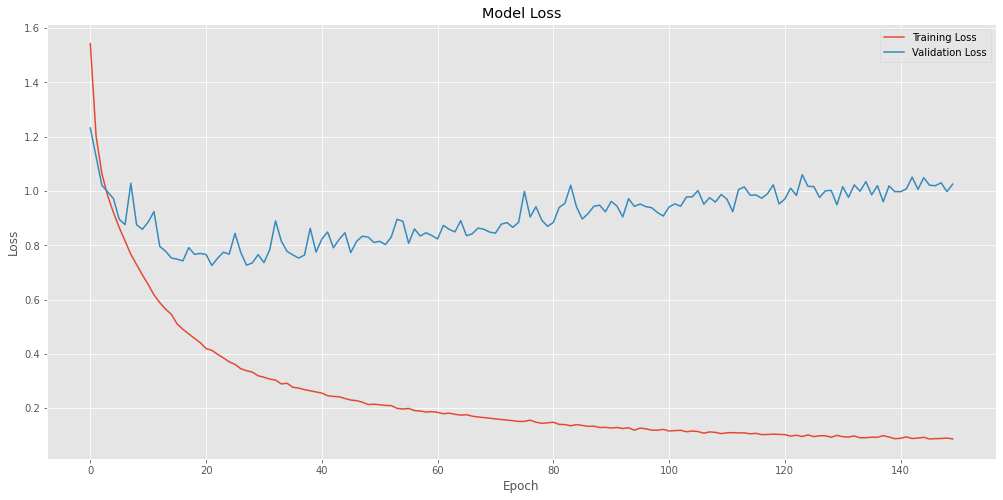

In [37]:
import matplotlib
matplotlib.style.use('ggplot')
plt.gcf().set_size_inches(17, 8, forward=True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper right')
plt.show()

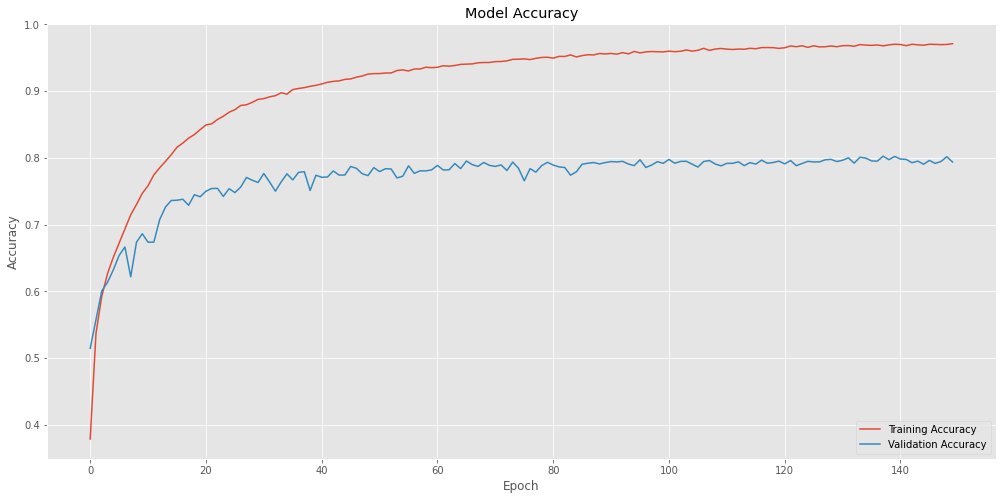

In [38]:
import matplotlib
matplotlib.style.use('ggplot')
plt.gcf().set_size_inches(17, 8, forward=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy','Validation Accuracy'], loc='lower right')
plt.show()